In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_conv_model3, get_vector_conv_model3, get_scalar_conv_model4, get_vector_conv_model4
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
dataset_name = 'mnist'
epochs = 10
num_tries = 30

train_dataset, test_dataset = get_test_datasets(dataset_name, feature_range=(0,1))  
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([28, 28, 1], [10])


# ConvNets C-P-C, with subsampled input

### Scalar

Average elapsed training time: 305.08610 sec
Last measures: [0.03891179338097572, 0.05699104070663452, 0.05290615186095238, 0.056038495153188705, 0.05956091359257698, 0.036528635770082474, 0.04863564670085907, 0.060950178653001785, 0.05177193507552147, 0.0450078509747982, 0.06471637636423111, 0.05857028812170029, 0.048107344657182693, 0.050825852900743484, 0.02729346603155136, 0.04899878054857254, 0.047227997332811356, 0.06787990033626556, 0.043860066682100296, 0.04174356162548065, 0.05648491904139519, 0.05859727784991264, 0.06945943832397461, 0.0409974567592144, 0.05489853024482727, 0.06010850891470909, 0.05765590816736221, 0.05833376571536064, 0.04869326949119568, 0.05518592521548271]
Loss history average: [0.07331352 0.06065319 0.05771792 0.0560053  0.05494264 0.05422802
 0.05374241 0.05337039 0.05307451 0.0528313 ]
Measure history average: [0.06280084 0.05834212 0.05632531 0.05496315 0.05404365 0.05347595
 0.05305196 0.05272128 0.05245357 0.05223138]
Measure history worst: [0.07367

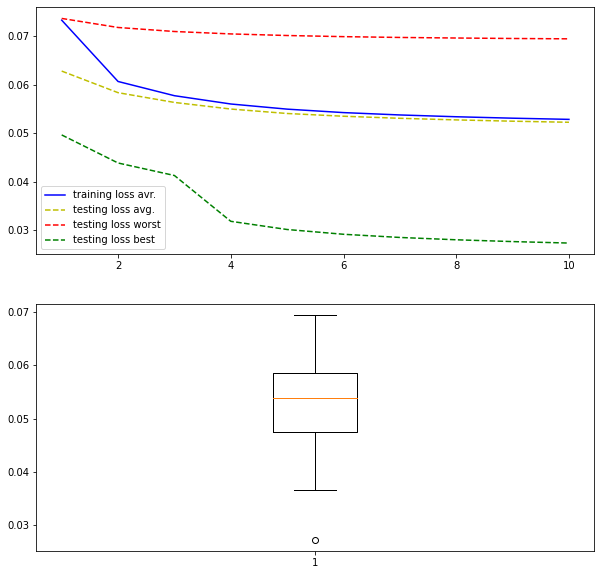

In [3]:
model_fun = lambda: get_scalar_conv_model3(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

### Vector

Average elapsed training time: 474.54662 sec
Last measures: [0.07148653268814087, 0.05250048264861107, 0.06663528084754944, 0.037330806255340576, 0.04535343497991562, 0.049710966646671295, 0.06398191303014755, 0.052761975675821304, 0.06893844157457352, 0.05590140447020531, 0.06045590341091156, 0.061297930777072906, 0.09000012278556824, 0.055629096925258636, 0.06366400420665741, 0.03323003649711609, 0.05646178126335144, 0.09000012278556824, 0.04506829008460045, 0.07376953214406967, 0.0700666606426239, 0.055164143443107605, 0.06912263482809067, 0.06740591675043106, 0.05349237099289894, 0.03919340670108795, 0.07469189167022705, 0.07005088776350021, 0.06527870893478394, 0.04353613406419754]
Loss history average: [0.07905387 0.06688112 0.06460362 0.06347666 0.06256003 0.06189002
 0.06152081 0.06124623 0.06100803 0.06079332]
Measure history average: [0.06876226 0.06491244 0.06342786 0.06240663 0.06156531 0.06104938
 0.06073755 0.06048833 0.06026064 0.06007269]
Measure history worst: [0.09000

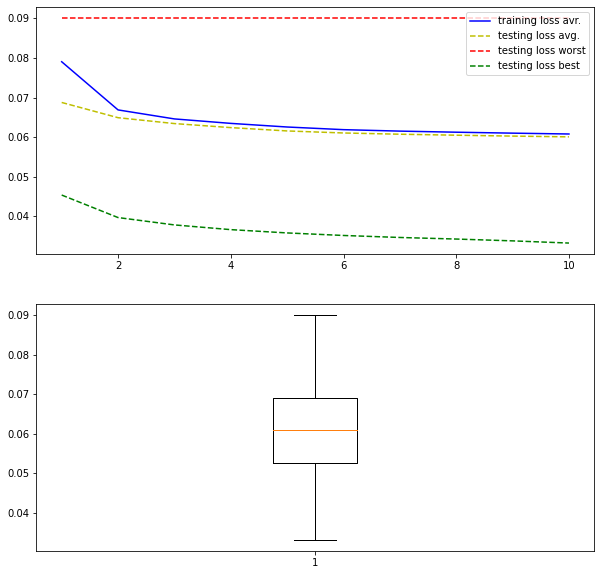

In [4]:
shared_inner_nets = False
model_fun = lambda: get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

Average elapsed training time: 487.54897 sec
Last measures: [0.06149232015013695, 0.08998051285743713, 0.04807378724217415, 0.046715762466192245, 0.06764749437570572, 0.060474250465631485, 0.06389544159173965, 0.05344225466251373, 0.050232965499162674, 0.08998050540685654, 0.0899786651134491, 0.061986323446035385, 0.08998134732246399, 0.09000015258789062, 0.04835072159767151, 0.09000014513731003, 0.09000012278556824, 0.09000012278556824, 0.09000027924776077, 0.09000014513731003, 0.05395882576704025, 0.04122498631477356, 0.09000013768672943, 0.060651060193777084, 0.08997617661952972, 0.08997970074415207, 0.055800653994083405, 0.05259551852941513, 0.09000027924776077, 0.0899808257818222]
Loss history average: [0.08180185 0.07523563 0.07436004 0.07391241 0.07362799 0.07341792
 0.07324683 0.07310615 0.07299133 0.07289525]
Measure history average: [0.07590859 0.07438646 0.07380781 0.07345546 0.07321398 0.07302089
 0.07286306 0.07273463 0.07263192 0.0725468 ]
Measure history worst: [0.090000

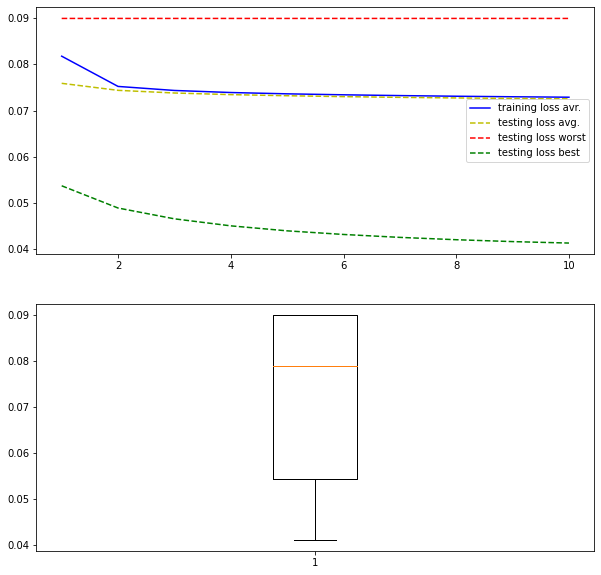

In [5]:
shared_inner_nets = True
model_fun = lambda: get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

# ConvNets C-C-P, with subsampled input

### Scalar

Average elapsed training time: 316.68809 sec
Last measures: [0.05982162430882454, 0.058250512927770615, 0.035211339592933655, 0.05499656870961189, 0.032025571912527084, 0.04691559076309204, 0.03324376046657562, 0.04312564805150032, 0.05164474621415138, 0.06018092483282089, 0.03563176095485687, 0.05024779215455055, 0.037217240780591965, 0.0293937586247921, 0.03322076052427292, 0.04219324141740799, 0.06066259741783142, 0.057263948023319244, 0.037546657025814056, 0.058859050273895264, 0.041836272925138474, 0.031776055693626404, 0.06452377140522003, 0.05192060396075249, 0.030985385179519653, 0.05489692464470863, 0.03653644397854805, 0.04409230127930641, 0.05374375730752945, 0.04474036395549774]
Loss history average: [0.06854815 0.05513486 0.05231122 0.05055332 0.04936417 0.04862425
 0.04806357 0.04751574 0.04693464 0.04659925]
Measure history average: [0.05694392 0.05295814 0.05080945 0.04924468 0.04831627 0.04765486
 0.04714431 0.04642834 0.04605779 0.04575683]
Measure history worst: [0.0

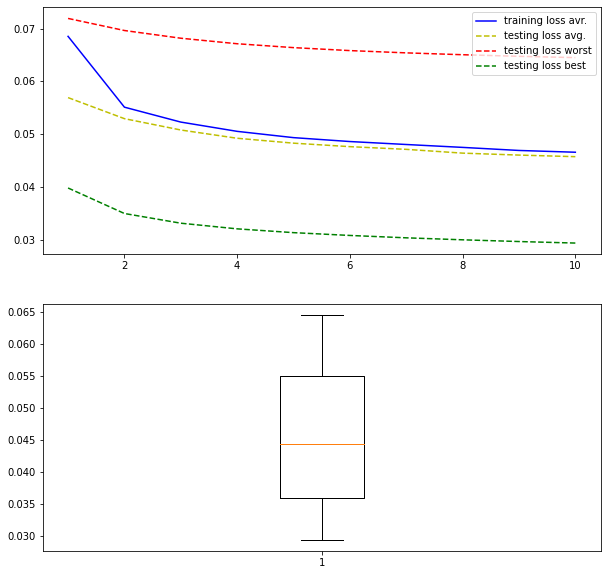

In [6]:
model_fun = lambda: get_scalar_conv_model4(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

### Vector

Average elapsed training time: 322.30459 sec
Last measures: [0.07378239184617996, 0.0763782411813736, 0.07645130902528763, 0.07911475002765656, 0.07123621553182602, 0.07490884512662888, 0.07326596230268478, 0.07363679260015488, 0.07789688557386398, 0.07537143677473068, 0.07351481914520264, 0.07815852016210556, 0.07129358500242233, 0.0775638148188591, 0.07914778590202332, 0.07669953256845474, 0.0700145810842514, 0.07619312405586243, 0.07774940878152847, 0.07306668907403946, 0.07551774382591248, 0.07326336950063705, 0.07560184597969055, 0.07176445424556732, 0.07343842089176178, 0.09000012278556824, 0.07588879019021988, 0.07808595150709152, 0.07591608911752701, 0.07741677016019821]
Loss history average: [0.08580967 0.07885197 0.07743571 0.07679914 0.07647683 0.07632073
 0.07621043 0.07612816 0.07604938 0.07595352]
Measure history average: [0.08032597 0.07770565 0.07684122 0.07637565 0.07618111 0.07605845
 0.07596967 0.07590466 0.07579879 0.07574461]
Measure history worst: [0.09000012 0.09

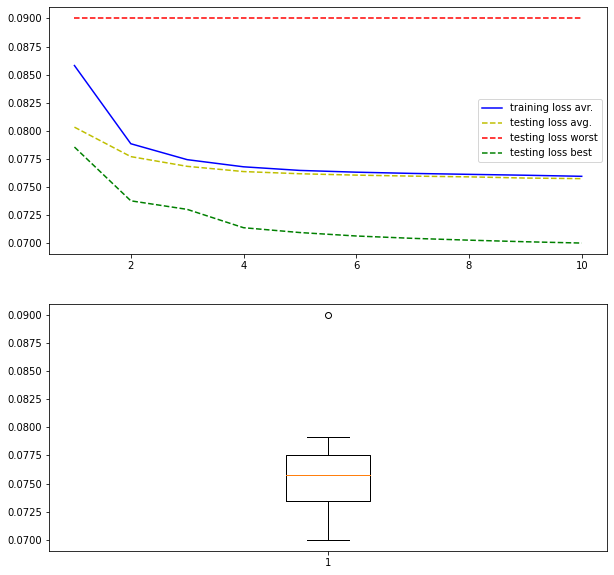

In [7]:
shared_inner_nets = False
model_fun = lambda: get_vector_conv_model4(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

Average elapsed training time: 84.34845 sec
Last measures: [0.07351993769407272, 0.07731107622385025, 0.07816866785287857, 0.07595279067754745, 0.07859665155410767, 0.0750368982553482, 0.07578450441360474, 0.07280321419239044, 0.07667529582977295, 0.07575640082359314, 0.07469674199819565, 0.07572219520807266, 0.07410988956689835, 0.08170894533395767, 0.0760914757847786, 0.0785527229309082, 0.07378216832876205, 0.07970034331083298, 0.08557970821857452, 0.07846838980913162, 0.07747098058462143, 0.07421526312828064, 0.07686888426542282, 0.07390252500772476, 0.0899781733751297, 0.07912248373031616, 0.07430620491504669, 0.07798648625612259, 0.07614961266517639, 0.07441306859254837]
Loss history average: [0.0866942  0.08069521 0.07907719 0.07840783 0.07809781 0.07790876
 0.07777686 0.07755384 0.07740969 0.07729963]
Measure history average: [0.08222138 0.07952178 0.07851517 0.07806244 0.07783358 0.077681
 0.07757599 0.07730458 0.07721194 0.07708106]
Measure history worst: [0.08998737 0.089981

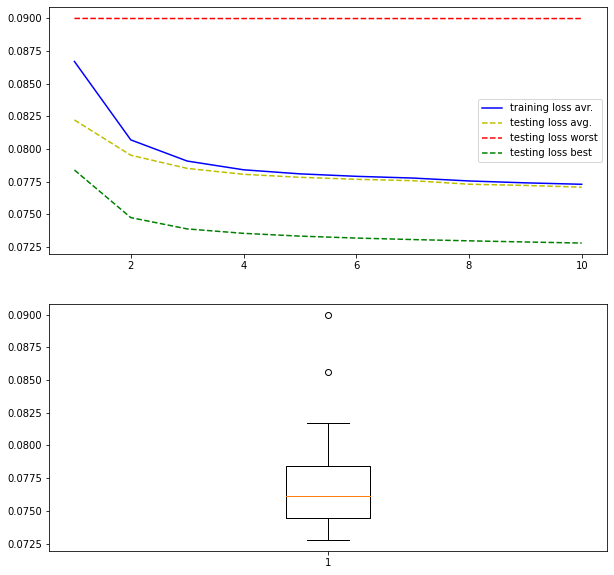

In [8]:
shared_inner_nets = True
model_fun = lambda: get_vector_conv_model4(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)